In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import importlib
from scipy.interpolate import make_interp_spline, BSpline
import os

Ниже построены графики для количества непредиктибл точек от количества итераций. Поскольку данные посчитаны многопоточно, нужно объединить результаты из нескольких потоков.

In [3]:
THREADS = 40
ITERATIONS = 120
DIRECTORY = "final_multithread_copy"
HORIZON = 100

In [4]:
start_points = []
points_for_thread = [0] * THREADS
for i in range(THREADS):
    try:
        thread_points = np.load(f"{DIRECTORY}/t{i}/start_points_{HORIZON}.npy", allow_pickle=True)
        start_points += list(thread_points)
        points_for_thread[i] = len(thread_points)
    except:
        pass

print(start_points)
res_to_draw = [0] * ITERATIONS
bad_to_draw = [0] * ITERATIONS
total_points = [0] * ITERATIONS
for i in range(THREADS):
    for iter in range(1, ITERATIONS):
        try:
            cur_bad = np.load(f"{DIRECTORY}/t{i}/bad_iter={iter}_{HORIZON}.npy", allow_pickle=True)
            cur_res = np.load(f"{DIRECTORY}/t{i}/res_iter={iter}_{HORIZON}.npy", allow_pickle=True)
            # print(cur_bad)
            # print(cur_res)
            bad_to_draw[iter] += sum(cur_bad)
            res_to_draw[iter] += sum(cur_res)
            total_points[iter] += points_for_thread[i]
        except:
            print(f"There are not enough iterations for thread {i} (ITERATIONS={iter})")
            break


for iter in range(ITERATIONS):
    if not total_points[iter]:
        continue
    bad_to_draw[iter] /= total_points[iter]
    res_to_draw[iter] /= total_points[iter]

[13865, 11678, 11785, 10419, 12589, 13662, 14804, 14405, 10157, 14791, 13026, 10479, 14054, 11390, 11273, 10328, 12463, 14075, 11586, 12682, 14741, 12168, 14853, 11142, 10531, 13606, 12188, 10533, 14668, 10721, 13486, 10348, 12419, 14058, 12448, 10636, 10731, 12314, 14855, 12554, 11245, 14217, 10067, 14120, 14906, 13763, 11348, 12178, 10595, 14109, 10907, 13581, 13626, 13831, 10056, 10354, 12857, 14061, 14795, 14901, 13707, 11999, 13566, 12502, 12736, 14891, 10253, 14597, 11620, 10517, 11811, 10786, 14104, 10644, 14038, 13757, 11757, 13500, 12326, 11115, 13955, 10538, 14388, 10875, 13106, 12009, 14621, 11423, 12889, 12701, 13989, 13346, 14221, 14308, 13564, 11512, 12816, 10159, 10527, 13396]


[0, 72.76, 70.81, 69.69, 69.07, 68.73, 68.06, 67.46, 66.17, 66.28, 66.14, 66.57, 65.84, 65.11, 64.91, 64.84, 64.58, 64.84, 64.42, 64.32, 64.48, 64.32, 64.65, 64.82, 64.64, 64.1, 64.02, 63.9, 63.6, 63.37, 63.57, 63.88, 63.85, 63.85, 63.67, 63.96, 63.86, 63.82, 63.46, 63.5, 63.66, 63.57, 63.38, 63.32, 63.57, 63.6, 63.67, 63.56, 63.54, 63.46, 63.42, 63.33, 63.51, 63.42, 63.63, 63.18, 63.43, 63.24, 63.46, 63.21, 63.34, 63.19, 63.4, 63.39, 63.67, 63.48, 63.64, 63.47, 63.48, 63.23, 63.41, 63.29, 63.4, 63.45, 63.51, 63.01, 63.24, 63.21, 63.42, 63.13, 63.2, 63.11, 63.11, 63.1, 63.02, 63.04, 63.2, 62.9, 63.24, 63.04, 63.04, 62.84, 63.06, 63.19, 63.22, 63.16, 63.09, 62.97, 63.31, 63.25, 63.28, 63.08, 63.25, 62.95, 63.04, 63.07, 63.03, 63.08, 63.05, 63.02, 63.07, 63.27, 62.85, 62.74, 62.91, 62.75, 62.85, 62.8, 63.03, 62.98]


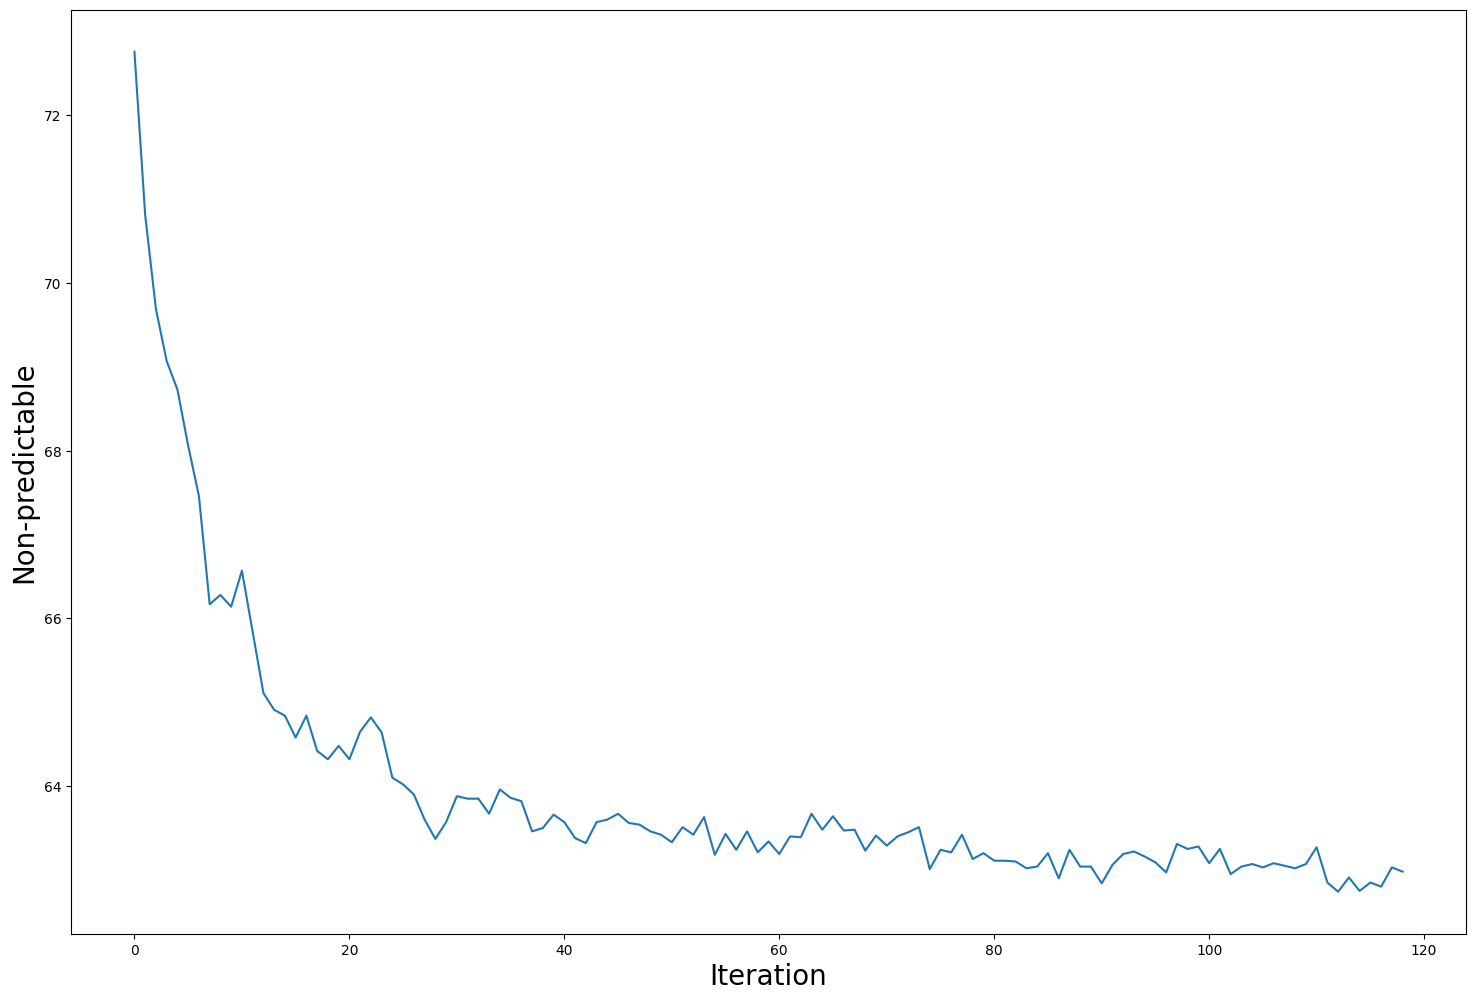

In [5]:
print(bad_to_draw)
plt.figure(figsize=(18, 12))
plt.plot(bad_to_draw[1:])
plt.xlabel("Iteration", size=20)
plt.ylabel("Non-predictable", size=20)
plt.show()

[0, 0.014573629690229966, 0.015218176228348104, 0.01573182139744679, 0.01597190431303665, 0.01688082741776168, 0.016819155825554787, 0.016965775899984627, 0.018293479628612996, 0.017916525962201203, 0.01806140849510926, 0.017749448525477548, 0.01786619195872434, 0.01813382944854057, 0.018540069635355733, 0.017924238462716326, 0.018282061160483906, 0.01841183199411114, 0.018750682771107238, 0.01848774022699036, 0.01820239500327911, 0.018541008692198106, 0.018508922223729865, 0.018356573033990017, 0.018405348178538318, 0.018704353900619572, 0.018793996559697074, 0.018631427126334307, 0.018802527156189724, 0.019059493266475946, 0.018994887546707213, 0.01897812910085487, 0.019082307986993834, 0.018916616591155747, 0.01900858677652478, 0.01887343724922078, 0.018966981347449893, 0.018874590540661172, 0.019198783705292818, 0.019192953079639204, 0.018760932871354552, 0.019032366614618573, 0.019085722234386624, 0.019054504902137157, 0.018666720271269453, 0.018845856044438183, 0.0187331004662344

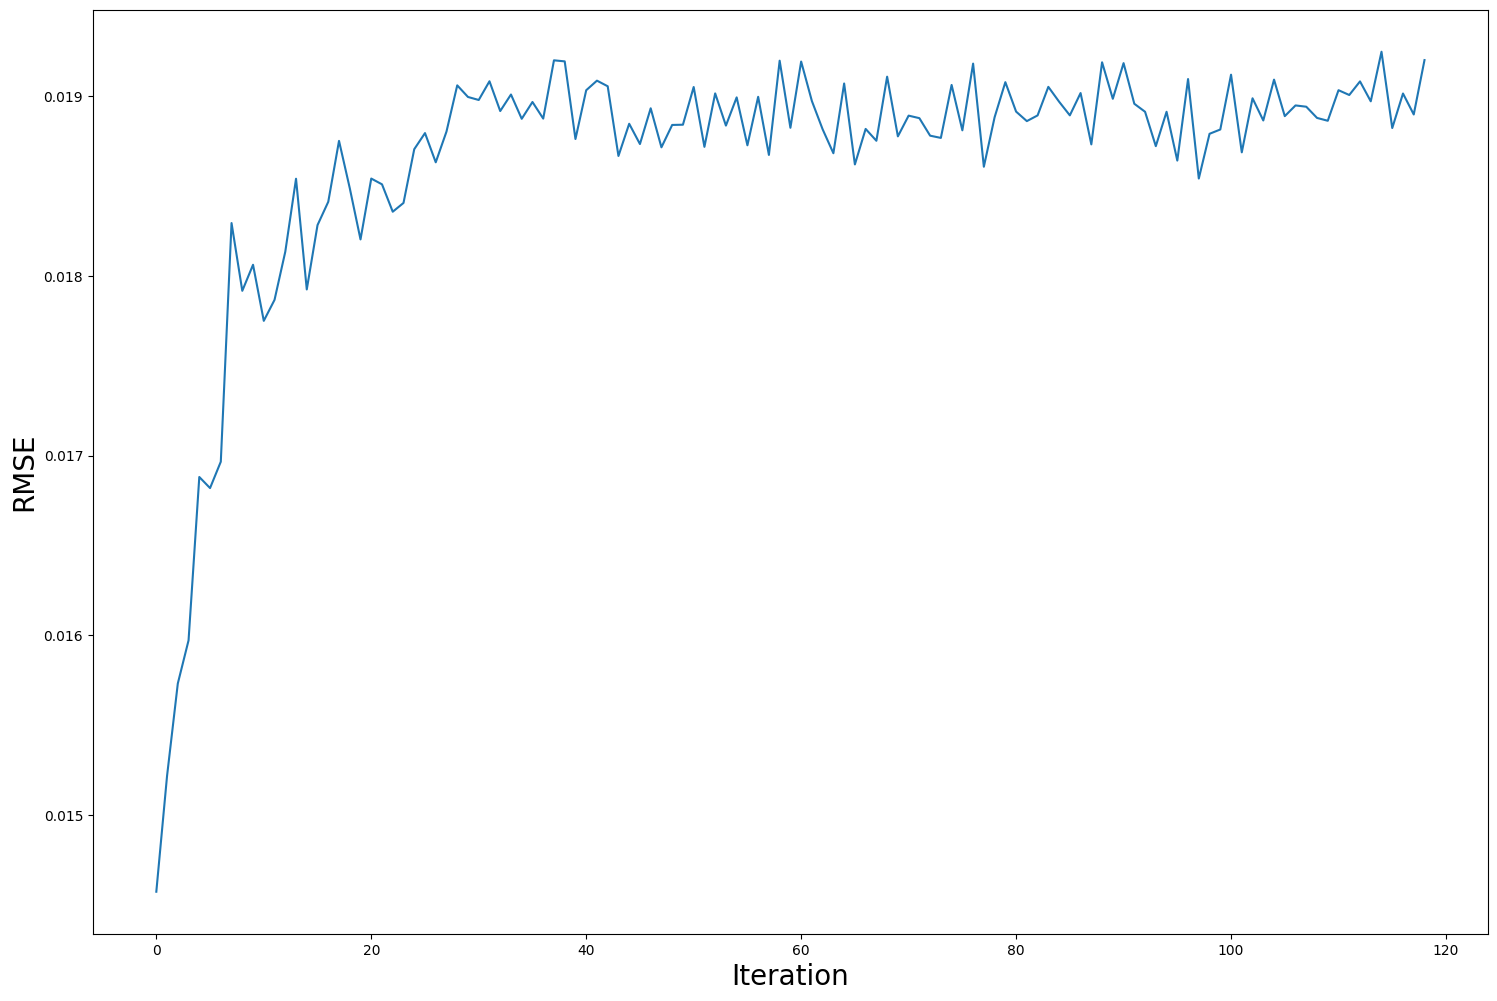

In [6]:
print(res_to_draw)
plt.figure(figsize=(18, 12))
plt.plot(res_to_draw[1:])
# plt.legend("best_loc")
plt.xlabel("Iteration", size=20)
plt.ylabel("RMSE", size=20)
plt.show()